In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression_copy import Regression
from codes.kernels_for_GPK import Spectrum_Kernel, Sum_Spectrum_Kernel

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

Model:  GaussianProcessRegressor(alpha=0.05, copy_X_train=True,
                         kernel=Spectrum_Kernel(sigma_0=1e-10),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
Train RMSE: 0.3478070033012365
Test RMSE: 0.5679685655059536


(0.3478070033012365, 0.5679685655059536)

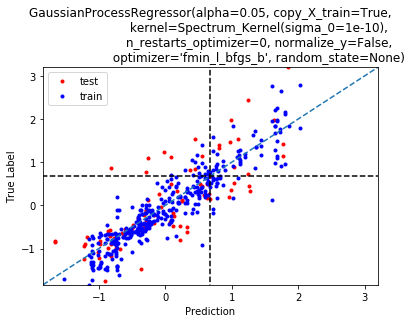

In [7]:
Path = '../../data/firstRound_4h+Baseline.csv'

df = pd.read_csv(Path)
df = df.loc[df['Group'] != 'Baseline data']

reg = Regression(GaussianProcessRegressor, Spectrum_Kernel, np.asarray(df[['RBS', 'label']]))
reg.train()
reg.evaluate()

Model:  GaussianProcessRegressor(alpha=0.05, copy_X_train=True,
                         kernel=Spectrum_Kernel(sigma_0=1e-10),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
Train RMSE: 0.493873542402775
Test RMSE: 0.5256755852122419


(0.493873542402775, 0.5256755852122419)

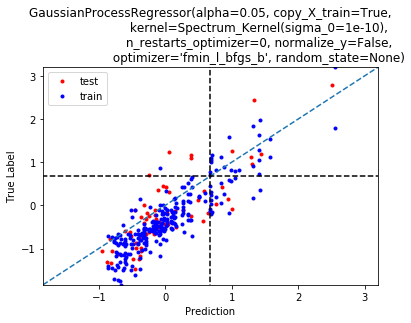

In [11]:
Path = '../../data/firstRound_4h+Baseline.csv'

df = pd.read_csv(Path)
df = df.loc[df['Group'] != 'Baseline data'].loc[df['Group'] != 'bps_noncore']

reg = Regression(GaussianProcessRegressor, Spectrum_Kernel, np.asarray(df[['RBS6', 'label']]))
reg.train()
reg.evaluate()